# Creating Neural Networks for Regression and Classification Tasks

* by Morrison Fowlks

# About the Data
We will be using two datasets for this analysis:

## California housing dataset
* MedInc
* HouseAge
* AveRooms
* AveBedrms
* Population
* AveOccup
* Latitude
* Longitude

## Iris dataset
* sepal length (cm)
* sepal width (cm)
* petal length (cm)
* petal width (cm)



# Problem Statement

One needs to construct a neural network for both a regression and classification task. We'll be using the california dataset for the regression portion, and iris for classification.

# Part 1

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.datasets import fetch_california_housing
iris = fetch_california_housing()
House_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
House_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


There are a total of 8 observations in this dataset, with 4 unique values in each column. There are no missing values, as seen in the .head() function compared to the actual dataset description seen above.

# Step 2.2: Visualization

C:\Users\morri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

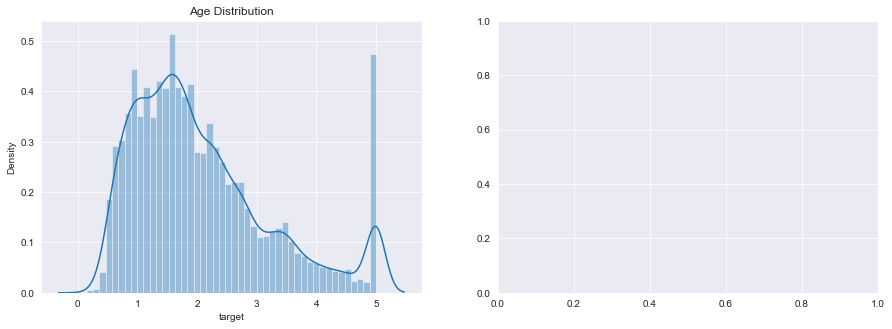

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(House_data['target'], ax=axes[0])
axes[0].set_title('Age Distribution')


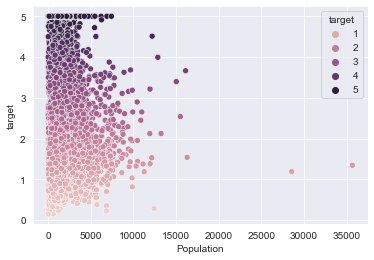

In [84]:
sns.scatterplot(x = 'Population', y = 'target', hue = 'target', data = House_data)
plt.show()

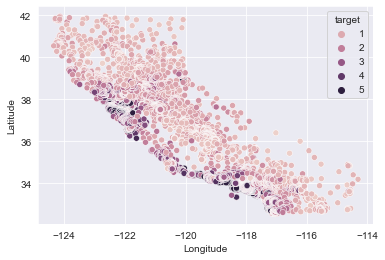

In [85]:
sns.scatterplot(x = 'Longitude', y = 'Latitude', hue = 'target', data = House_data)
plt.show()

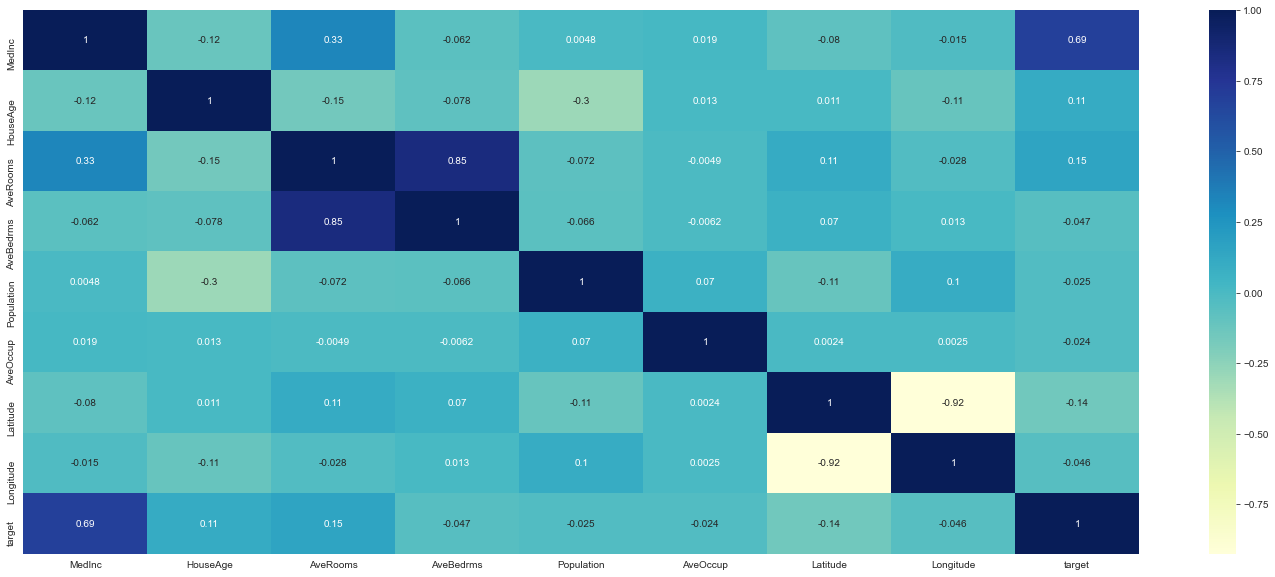

In [49]:
plt.figure(figsize = (25, 10))
sns.heatmap(House_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

Many conclusions can be made when looking at the graphs generated, many of which may ultimately be very useful when solving our overall problem statement. While looking at the histogram of the median house value (y), one can conclude that the median house age would be between 0.75 to 2.0 years old. Although, with the majority of houses being within this range, the second highest age median after 1.65 years would be that of 5 years of age. After looking at the scatter plot of the Population vs. House Value (y), one can conclude that the highest concentrations of the population would be between that of 0 to 5000; with increases of house value, increasing the correlation between population and house value. The scatter plot of Longitude vs. Latitude can also give major insight into the geographic decisions house owners make in the given dataset. In this scatterplot, one can see that the highest concentrations of houses are between longitudes of -123 to -118, and latitudes of 39 to 33. Finally, when looking at the heatmap of the data, one can see that there is heavy correlation between that of AveRooms and AveBedrms, with a correlation of 0.85. The second highest correlation in this heatmap would be between that of Medinc and target, being 0.69; and finally AveRooms and Medinc, with a correlation of 0.33.

Text(0.5, 1.0, 'AveOccup vs. House value')

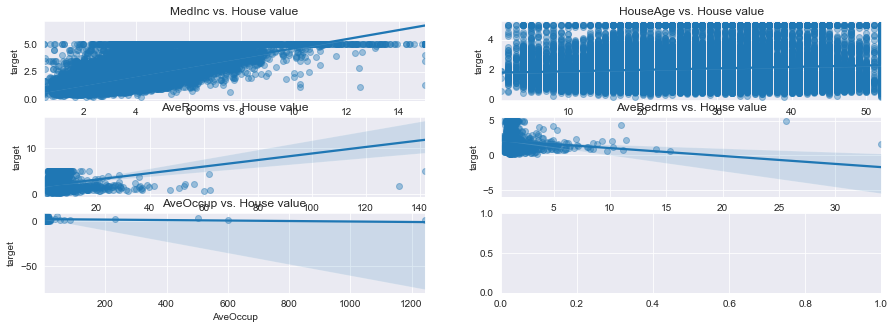

In [57]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 5))
sns.regplot(x='MedInc', y='target', data=House_data, ax=axes[0][0], scatter_kws={'alpha':0.4})
axes[0][0].set_title('MedInc vs. House value')
sns.regplot(x='HouseAge', y='target', data=House_data, ax=axes[0][1], scatter_kws={'alpha':0.4})
axes[0][1].set_title('HouseAge vs. House value')

sns.regplot(x='AveRooms', y='target', data=House_data, ax=axes[1][0], scatter_kws={'alpha':0.4})
axes[1][0].set_title('AveRooms vs. House value')
sns.regplot(x='AveBedrms', y='target', data=House_data, ax=axes[1][1], scatter_kws={'alpha':0.4})
axes[1][1].set_title('AveBedrms vs. House value')

sns.regplot(x='AveOccup', y='target', data=House_data, ax=axes[2][0], scatter_kws={'alpha':0.4})
axes[2][0].set_title('AveOccup vs. House value')

When looking at the scatter plot of MedInc vs.house value, one can see that there is a positive relationship between the two, with high correlations between that of 0 to 8 of Medinc and 0 to 5 of House Value. When looking at the scatter plot of HouseAge vs. house value, one can see that there is a slight positive relationship between the two, with high correlations between that of 0 to 50 for HouseAge and 0 to 5 for House Value. When looking at the scatter plot of AveRooms vs. house value, one can see that there is a very positive relationship between the two, with high correlations between that of 0 to 40 for AveRooms and 0 to 5 for House Value. When looking at the scatter plot of AveBedrms vs. house value, one can see that there is a very negative relationship between the two, with high correlations between that of 0 to 4 for AveBedrms and 0 to 5 for House Value. Finally, when looking at the scatter plot of AveOccup vs. house value, one can see that there is a slightly negative relationship between the two, with high correlations only between that of 0 to 50 for AveOccup and solely 0 for that of House Value.   

### Creating a histogram for HouseAge.

C:\Users\morri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'HouseAge Distribution')

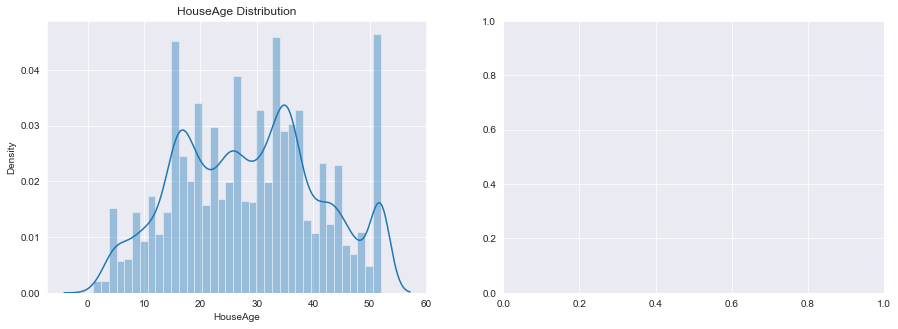

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(House_data['HouseAge'], ax=axes[0])
axes[0].set_title('HouseAge Distribution')

After analyzing the histogram for HouseAge, one can see that there is a high density of houses within the ages of 15 to 20 and between that of 30 to 38 years of age, with this range being slightly more dense than that of the younger range (15 to 20). There is also a high density of houses that are in their early 50s, although, with almost no houses being older than 60 years of age.


# Step 3: Model Creation

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(House_data)

scaled_house_df = pd.DataFrame(data=scaled_data, columns=House_data.columns)

X = scaled_house_df.drop(labels='target', axis=1)
y = scaled_house_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

C:\Users\morri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\morri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


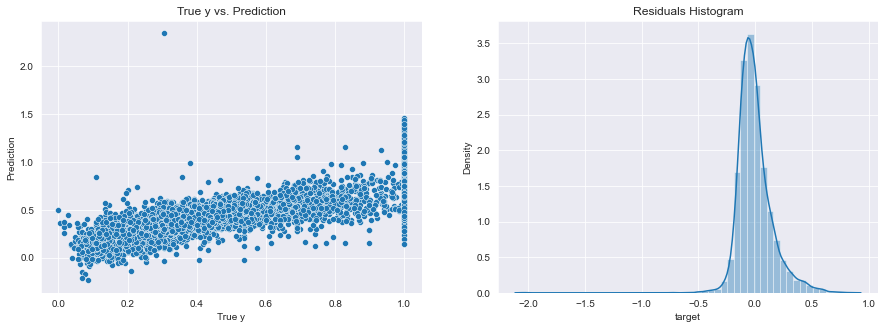

R-Squared:  0.5957702326061664


In [6]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.scatterplot(y_test, predictions, ax=axes[0])
axes[0].set_xlabel('True y')
axes[0].set_ylabel('Prediction')
axes[0].set_title('True y vs. Prediction')

sns.distplot((y_test-predictions), ax=axes[1])
axes[1].set_title('Residuals Histogram')

plt.show()

print('R-Squared: ', lm.score(X_test, y_test))

In [7]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

print("Training MLPRegressor...")
tic = time()
est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
est.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training MLPRegressor...
done in 5.254s
Test R2 score: 0.79


The overall regression model performed better than average, although it also had its downsides. The overall R^2 score of the model was only 0.596, with it's test R^2 scoring at around 0.76, which in all is not the worst. With the regression model, one can see that there was an overall positive relationship between that of the true Y compared to that of the predictions of the dataset. Overall, one can make many conclusions surrounding the findings of this data analysis, all in hopes to cluster and identify the varying aspects of houses in California. One can also see that when referring to houses in California, increases in house value increase the overall correlation between population and house value, which may be useful in the future when discussing housing in California and their coinciding house value. Another great finding in this dataset analysis would be that the majority of houses are usually between the ages of 15 to 20, 30 to 38 (this being the highest), and 50-58; which can give major insight into the demographics of houses in the California area. Overall, using the findings of this regression model and accompanying findings, one can use this information to not only gather a deeper insight into the housing of California, but also gain immense knowledge that may be useful in the given future.   

# Step 4: Classification Portion

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [71]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


There are no missing values in our dataset, as seen in the .head() function compared to the actual dataset description. There are a total of 4 observations in this dataset, with 4 unique values in each column. 

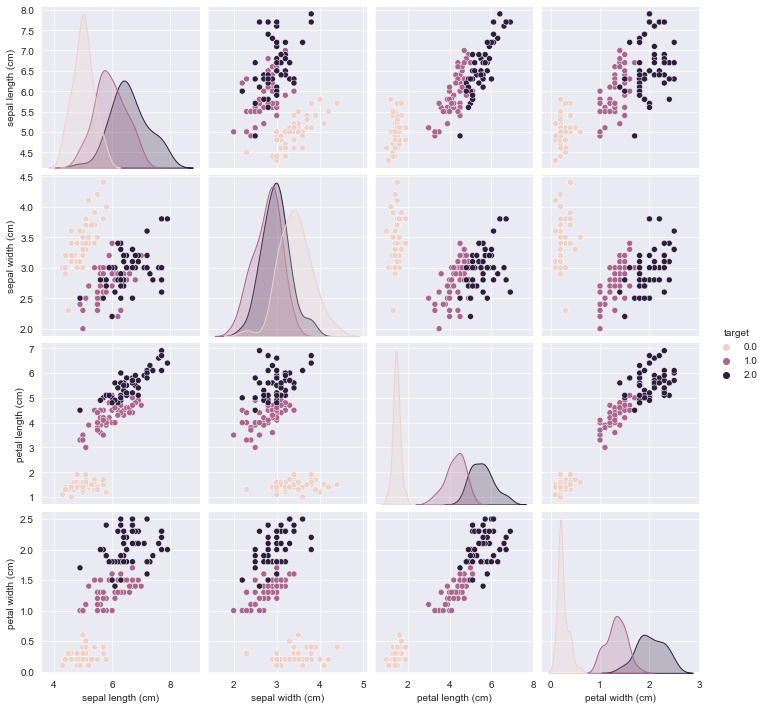

In [74]:
sns.pairplot(iris_data, hue='target', vars=['sepal length (cm)', 'sepal width (cm)', 
                                             'petal length (cm)',  'petal width (cm)'])
plt.show()

Many conclusions can be made when referring to the pairplot generated from our dataset. With this in mind, one can see that sepal length is usually between that of 5 to 7 centimeters, sepal width is usually between that of 2.5 to 3.5 centimeters, petal length is between that of 1 to 4.5 centimeters, and that petal width between that of 0 to 2 centimeters. One can also see that there is a positive relationship between that of petal length and petal width, a slight positive relationship between that of petal length and sepal length, and finally a slight positive relationship between that of petal width and sepal length. Many of the plots in this pairplot show high correlation among variables, with many clusters, which can be of major use when trying to solve the overall problem statement.   

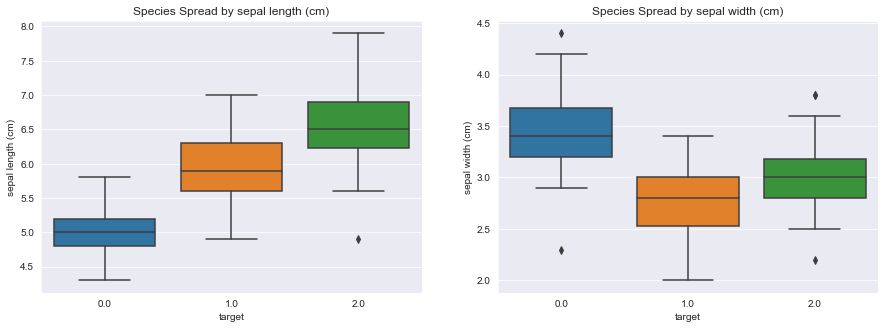

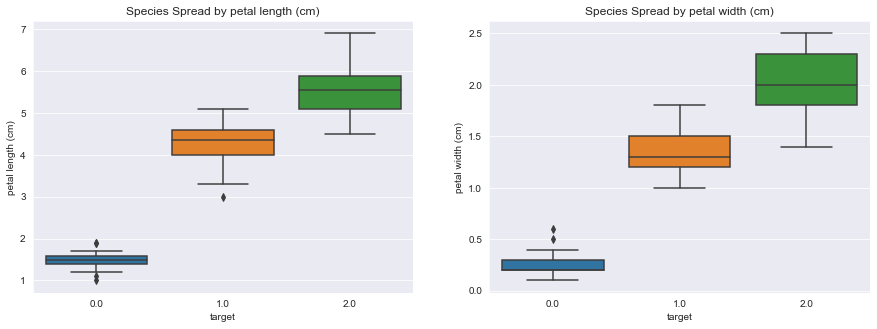

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.boxplot(x='target', y='sepal length (cm)', data=iris_data, ax=axes[0])
axes[0].set_title('Species Spread by sepal length (cm)')

sns.boxplot(x='target', y='sepal width (cm)', data=iris_data, ax=axes[1])
axes[1].set_title('Species Spread by sepal width (cm)')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.boxplot(x='target', y='petal length (cm)', data=iris_data, ax=axes[0])
axes[0].set_title('Species Spread by petal length (cm)')

sns.boxplot(x='target', y='petal width (cm)', data=iris_data, ax=axes[1])
axes[1].set_title('Species Spread by petal width (cm)')
plt.show()

Many conclusions can be made surrounding the given boxplots, and their importance towards our dataset analysis. With this in mind, when referring to the boxplot of Species Spread by sepal length, one can see that species 0 has a sepal length between that of 4.8 to 5.2 cm, that species 1 has a sepal length between that of 5.6 to 6.4 cm (This being the highest range), and finally species 2 has a sepal length between that of 6.3 to 6.9 cm. When looking at the boxplot of Species Spread by sepal width, one can see that species 0 has a sepal width between that of 3.7 to 3.3 cm, that species 1 has a sepal width between that of 3.0 to 2.5 cm (this being the highest range), and finally species 2 has a sepal width between that of 3.3 to 2.8 cm. When looking at the boxplot of Species Spread by petal length, one can see that species 0 has a petal length between that of 1.4 to 1.6 cm, species 1 has a petal length between that of 4.0 to 4.6 cm, and finally species 2 has a petal length between that of 5.0 to 6.0 cm (this being the highest range of length). Finally, when looking at the boxplot of Species Spread by petal width, one can see that species 0 has a petal width between that of 0.2 to 0.3 cm, species 1 has a petal width between that of 1.3 to 1.5 cm, and finally species 2 has a petal width between that of 1.7 to 2.3 cm (with this being the highest range of length).

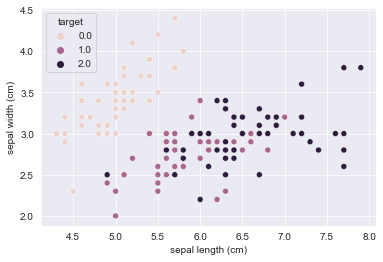

In [81]:
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'target', data = iris_data)
plt.show()

Many conclusions can be made surrounding the scatterplot of sepal length (cm) vs. sepal width (cm), especially when trying to solve our overall problem statement. With this in mind, one can see that Species 0 has a majority of shorter sepal lengths compared to the other species in this dataset, as well as a higher sepal width than the others. Compared to the other species in this dataset, species 2 usually has a longer sepal length than the rest, with a medium sepal width, being between that of 2.6 to 3.7 cm. Finally, when referring to species 1, one can conclude that this species is the overall average of the two, with both its sepal length and sepal width being within the medium lengths, with very little outliers.

# Step 5: Model Creation 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(iris_data)

scaled_house_df = pd.DataFrame(data=scaled_data, columns=iris_data.columns)

X = scaled_house_df.drop(labels='target', axis=1)
y = scaled_house_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

print("Training MLPRegressor...")
tic = time()
est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
est.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training MLPRegressor...
done in 0.161s
Test R2 score: 0.77


C:\Users\morri\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (105). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


C:\Users\morri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\morri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


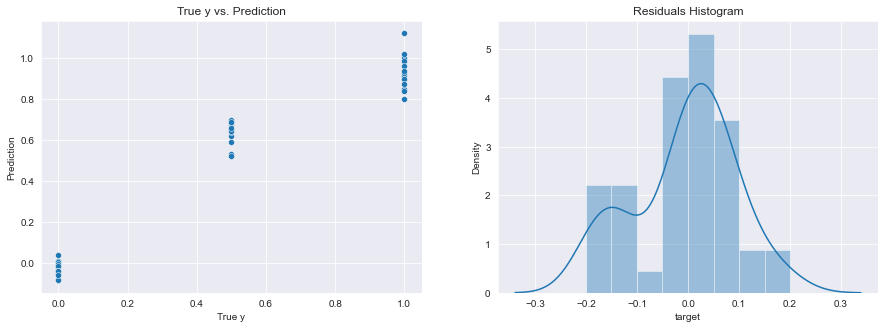

R-Squared:  0.9442318571467434


In [10]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.scatterplot(y_test, predictions, ax=axes[0])
axes[0].set_xlabel('True y')
axes[0].set_ylabel('Prediction')
axes[0].set_title('True y vs. Prediction')

sns.distplot((y_test-predictions), ax=axes[1])
axes[1].set_title('Residuals Histogram')

plt.show()

print('R-Squared: ', lm.score(X_test, y_test))

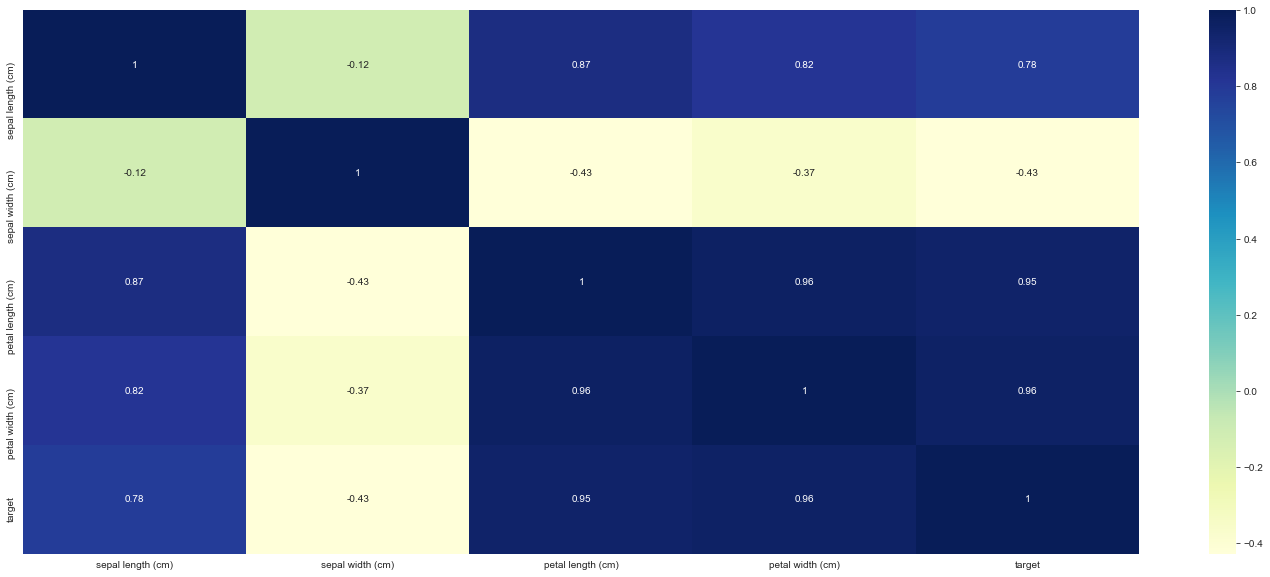

In [5]:
plt.figure(figsize = (25, 10))
sns.heatmap(iris_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

The findings of the heatmap only confirm the findings of the earlier plots, showcasing that there are strong correlations between that of petal width and petal length, petal length and sepal length, sepal length and petal width, target and petal length, target and petal width, and finally target and sepal length. After completing the classification model on our dataset, one can see that it worked very well in solving our problem statement, having an overall R^2 score of 0.94. When looking at the classification model and accompanying findings, one can see that there is a very simple classification of flowers which depends on a variation of variables. With this in mind, a tulip will be of species 0 if it has shorter sepal length as well as higher sepal widths than others. Whereas if a tulip has an average sepal length and sepal width, it would most likely be of species 1. Finally, if a tulip has a longer sepal length and medium sepal width, then it is most likely of species 2. With these findings, one can now easily determine the species of a tulip, solely by looking at it. Overall, this dataset analysis not only saves time and effort for the future, but does so in an efficient way.